# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Import API key
from api_keys import weather_api_key

In [2]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List 
lat_lngs = []
cities = []

# Create radom combinations of latitude and longitutes
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# List
city_info = []

# api URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create counters
record_count = 1
set_count = 1

print("Beginning Data Retrieval:")

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # url for each cities 
    specific_url = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    #Api request
    try:
        city_weather = requests.get(specific_url).json()

        #info
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # list we created that now we fill
        city_info.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 

print("Data Retrieval Complete!")

        
        

Beginning Data Retrieval:
Processing Record 1 of Set 1 | hovd
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | juba
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | grand-santi
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | ponta delgada
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | lavrentiya
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | springdale
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | rosetta
Processing Record 19 of Set 1 | ancud
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | nemuro
Processing Record 23 of Set 1 | codrington
Processing R

Processing Record 36 of Set 4 | san quintin
Processing Record 37 of Set 4 | aljezur
Processing Record 38 of Set 4 | eldorado
Processing Record 39 of Set 4 | porto novo
Processing Record 40 of Set 4 | kerchevskiy
Processing Record 41 of Set 4 | roald
Processing Record 42 of Set 4 | homer
Processing Record 43 of Set 4 | mareeba
Processing Record 44 of Set 4 | solnechnyy
Processing Record 45 of Set 4 | namatanai
Processing Record 46 of Set 4 | axim
Processing Record 47 of Set 4 | yenagoa
Processing Record 48 of Set 4 | husavik
Processing Record 49 of Set 4 | nizwa
Processing Record 0 of Set 5 | mayo
Processing Record 1 of Set 5 | kodiak
Processing Record 2 of Set 5 | launceston
Processing Record 3 of Set 5 | dolores
Processing Record 4 of Set 5 | yar-sale
Processing Record 5 of Set 5 | cockburn town
Processing Record 6 of Set 5 | yako
Processing Record 7 of Set 5 | tibu
Processing Record 8 of Set 5 | puerto ayacucho
Processing Record 9 of Set 5 | doka
Processing Record 10 of Set 5 | soron

Processing Record 29 of Set 8 | limay
Processing Record 30 of Set 8 | berbera
Processing Record 31 of Set 8 | tromso
Processing Record 32 of Set 8 | doba
Processing Record 33 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 34 of Set 8 | naron
Processing Record 35 of Set 8 | gumdag
Processing Record 36 of Set 8 | bardiyah
Processing Record 37 of Set 8 | san juan
Processing Record 38 of Set 8 | provideniya
Processing Record 39 of Set 8 | lengshuitan
Processing Record 40 of Set 8 | vila franca do campo
Processing Record 41 of Set 8 | timizart
Processing Record 42 of Set 8 | skibbereen
Processing Record 43 of Set 8 | teya
Processing Record 44 of Set 8 | ayorou
Processing Record 45 of Set 8 | sept-iles
Processing Record 46 of Set 8 | bon accord
Processing Record 47 of Set 8 | bayshore gardens
Processing Record 48 of Set 8 | tabuk
Processing Record 49 of Set 8 | khorinsk
Processing Record 0 of Set 9 | macapa
Processing Record 1 of Set 9 | sistranda
Processing Record 2 of Set

Processing Record 19 of Set 12 | keningau
Processing Record 20 of Set 12 | tamale
Processing Record 21 of Set 12 | mandalgovi
Processing Record 22 of Set 12 | aykhal
Processing Record 23 of Set 12 | gouyave
Processing Record 24 of Set 12 | contai
Processing Record 25 of Set 12 | fenoarivo
Processing Record 26 of Set 12 | roma
Processing Record 27 of Set 12 | kyren
Processing Record 28 of Set 12 | herat
Processing Record 29 of Set 12 | nassau
Processing Record 30 of Set 12 | irbeyskoye
Processing Record 31 of Set 12 | vitoria da conquista
Processing Record 32 of Set 12 | karpathos
Processing Record 33 of Set 12 | bisho
Processing Record 34 of Set 12 | xuddur
Processing Record 35 of Set 12 | fuerte olimpo
Processing Record 36 of Set 12 | iskateley
Processing Record 37 of Set 12 | along
Data Retrieval Complete!


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_pd = pd.DataFrame(city_info)


In [7]:
city_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hovd,48.0056,91.6419,56.93,51,46,3.49,MN,1662758054
1,atuona,-9.8000,-139.0333,75.90,81,57,26.84,PF,1662758055
2,nikolskoye,59.7035,30.7861,45.88,78,10,4.25,RU,1662758055
3,juba,4.8517,31.5825,71.56,87,79,4.25,SS,1662758056
4,ushuaia,-54.8000,-68.3000,49.66,50,20,2.30,AR,1662757827


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,19.659517,15.926284,67.029337,71.709024,53.217311,7.541492,1.662758e+09
std,33.008325,88.672193,15.202455,21.317838,40.139387,5.312036,8.922082e+01
min,-54.800000,-175.200000,32.090000,10.000000,0.000000,0.000000,1.662758e+09
25%,-7.705700,-63.883350,54.320000,61.000000,9.000000,3.610000,1.662758e+09
50%,22.566700,18.733300,69.600000,78.000000,55.000000,6.220000,1.662758e+09
75%,46.424350,96.430900,77.755000,88.000000,99.000000,10.235000,1.662758e+09
max,78.218600,179.316700,107.080000,100.000000,100.000000,27.130000,1.662758e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
cityhighhum = city_pd[(city_pd["Humidity"] > 100)].index
cityhighhum

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
citydrop = city_pd.drop(cityhighhum, inplace=False)
citydrop.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hovd,48.0056,91.6419,56.93,51,46,3.49,MN,1662758054
1,atuona,-9.8000,-139.0333,75.90,81,57,26.84,PF,1662758055
2,nikolskoye,59.7035,30.7861,45.88,78,10,4.25,RU,1662758055
3,juba,4.8517,31.5825,71.56,87,79,4.25,SS,1662758056
4,ushuaia,-54.8000,-68.3000,49.66,50,20,2.30,AR,1662757827


In [13]:
lats = citydrop["Lat"]
max_temps = citydrop["Max Temp"]
humidity = citydrop["Humidity"]
cloudiness = citydrop["Cloudiness"]
wind_speed = citydrop["Wind Speed"]

# make into new csv
citydrop.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

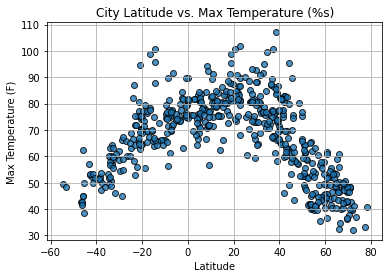

In [15]:
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("..//output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

In [19]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x")
plt.grid(True)
plt.show()
          
# Save 
plt.savefig("..//output_data/Fig2.png")


SyntaxError: invalid syntax (1396918621.py, line 7)

## Latitude vs. Cloudiness Plot

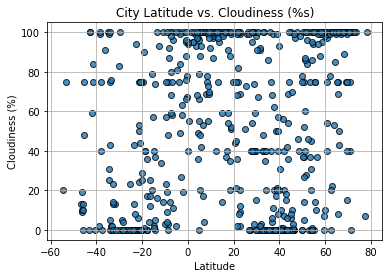

In [22]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

# Save 
plt.savefig("..//output_data/Fig3.png")


## Latitude vs. Wind Speed Plot

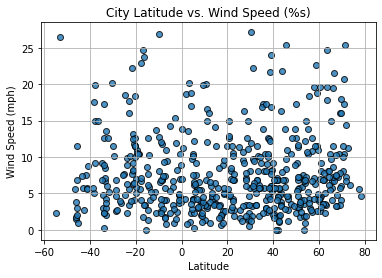

<Figure size 432x288 with 0 Axes>

In [26]:
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Wind Speed (%s)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

# Save 
plt.savefig("..//output_data/Fig4.png")

## Linear Regression

In [28]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # regresson: southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    #print(f"The r-value is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

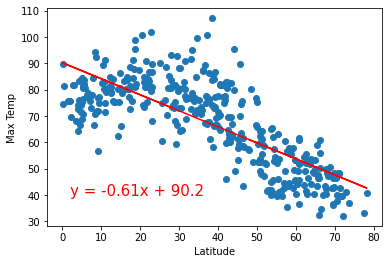

In [35]:
north_hemi = city_pd.loc[(city_pd["Lat"] >= 0)]
south_hemi = city_pd.loc[(city_pd["Lat"] < 0)]

x = north_hemi["Lat"]
y = north_hemi["Max Temp"]
plot_linear_regression(x, y, 'Max Temp',(2,40))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

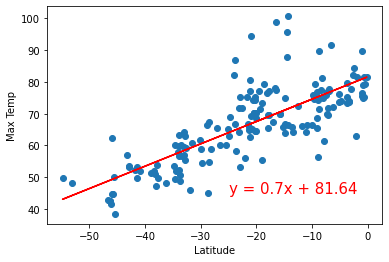

In [44]:
x = south_hemi["Lat"]
y = south_hemi["Max Temp"]
plot_linear_regression(x, y, 'Max Temp', (-25, 45))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

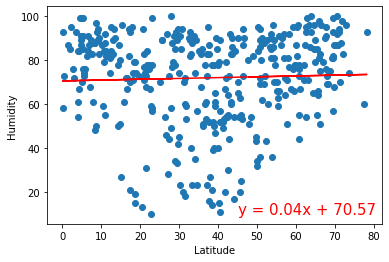

In [62]:
x = north_hemi["Lat"]
y = north_hemi["Humidity"]
plot_linear_regression(x, y, 'Humidity', (45, 10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

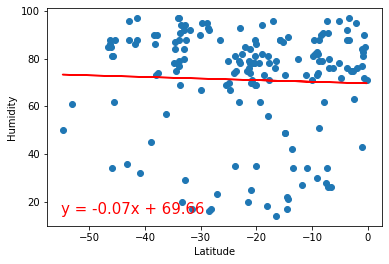

In [59]:
x = south_hemi["Lat"]
y = south_hemi["Humidity"]
plot_linear_regression(x, y, 'Humidity', (-55, 15))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

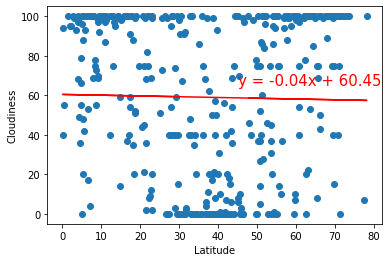

In [66]:
x = north_hemi["Lat"]
y = north_hemi["Cloudiness"]
plot_linear_regression(x, y, 'Cloudiness',(45,65))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

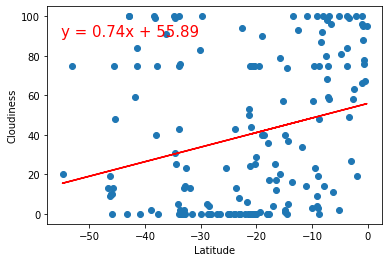

In [68]:
x= south_hemi["Lat"]
y = south_hemi["Cloudiness"]
plot_linear_regression(x, y, 'Cloudiness', (-55,90))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

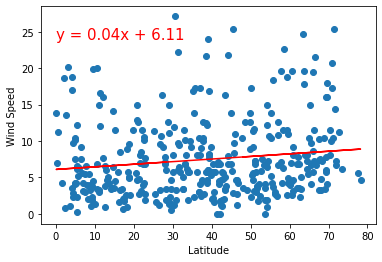

In [72]:
x = north_hemi["Lat"]
y = north_hemi["Wind Speed"]
plot_linear_regression(x, y, 'Wind Speed', (0,24))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

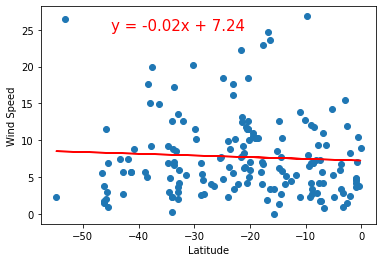

In [74]:
x = south_hemi["Lat"]
y = south_hemi["Wind Speed"]
plot_linear_regression(x, y, 'Wind Speed', (-45, 25))